## ML Cluster Analysis Assignment

### Identifying high yeilding customers in e-commerce Dataset

#### Introduction

The aim of this analysis is to identify the customers into three groups :
* 1. High Value Customer
* 2. Middle Value Customer
* 3. Low Value Customer

Customer Segmentation is a very broad subject matter, we would like to focus on e-commerce and particularly on understanding customers using the website for purchasing goods. 

Why is it important to understand the customer base?

E-commerce is being used in every walk of life. So, it is important for a business to understand their customer behavior. This use case focuses on identifying the segments which are highly yeilding and that have a potential to yeild profits.

What is in this kernel?

* Data Cleaning
* Understanding the variables
    * Univariate Analysis
    * Understanding KPIs
* Clustering 
    * Agglomerative
    * K-means

In [1]:
# Importing Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
os.chdir("C:\\Users\\Soumya\\Desktop\\Python")
sales = pd.read_csv("sales_data_sample.csv", encoding = "ISO-8859-1")

In [3]:
sales.sample(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2574,10275,39,100.0,16,4472.52,7/23/2004 0:00,Shipped,3,7,2004,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
1265,10394,37,100.0,1,6376.58,3/15/2005 0:00,Shipped,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2739,10373,37,100.0,8,4025.60,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium


###  Data cleaning

In [4]:
sales.shape  # Shape of the dataframe

(2823, 25)

In [5]:
#Removing unnecessary columns which do not have any significance - Phone, Address line 1, Address Line 2,Territory,State, PostalCode
cols_drop = ['PHONE','ADDRESSLINE1','ADDRESSLINE2','TERRITORY','STATE','POSTALCODE']
sales = sales.drop(cols_drop, axis=1)

In [6]:
# data glimpse
sales.sample(3)
sales.shape

(2823, 19)

In [7]:
# Checking for missing values
sales.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [8]:
# Checking datatypes

sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [9]:
# Changing OrderDate datatype from object to datetime

sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])   

No inconsistent datatypes and missing values, so good to go

In [10]:
# Understanding the central tendencies and dispersion of numerical variables

num_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
sales[num_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


* Quantity Ordered has less skewness.
* Price is having high values below Q3, so left skewed.
* Sales is having high values above Q3, so right skewed.
* MSRP is having very less skew.

### Understanding the variables

#### Univariate Analysis

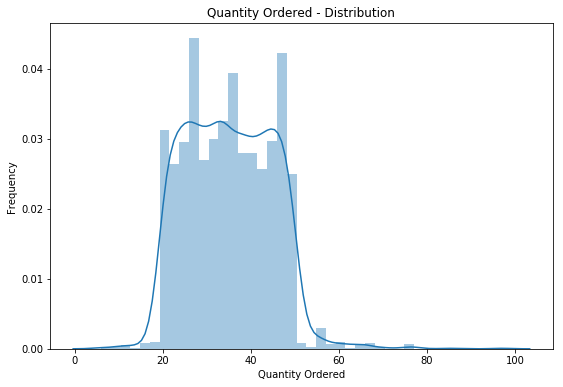

In [11]:
# Plotting Histograms for numerical variables

# Quantity Ordered
plt.figure(figsize=(9,6))
sns.distplot(sales['QUANTITYORDERED'])
plt.title('Quantity Ordered - Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

It is observed that most of the orders are varying from 20-55 units

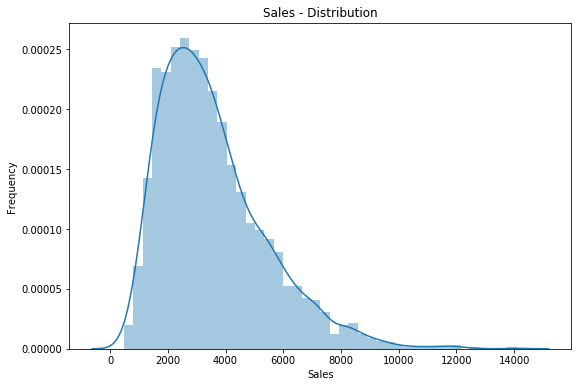

In [14]:
# Sales - Distribution
plt.figure(figsize=(9,6))
sns.distplot(sales['SALES'])
plt.title('Sales - Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

The distribution is right skewed and most of the sales are varying from 1800-5000

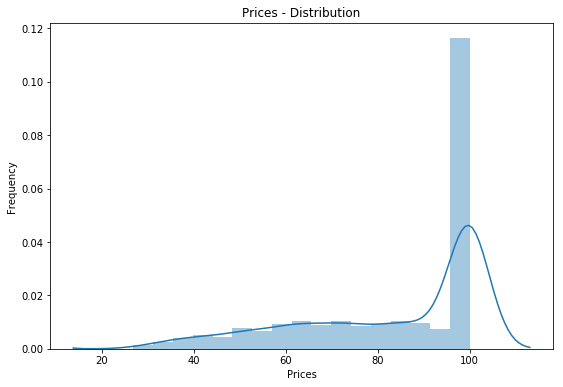

In [15]:
# Prices - Distribution
plt.figure(figsize=(9,6))
sns.distplot(sales['PRICEEACH'])
plt.title('Prices - Distribution')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

The distribution of Prices is left skewed and highest price of product being sold is 100$.

In [16]:
# Understanding the STATUS variable
sales['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

In [17]:
# Checking the DateTime variables
sales.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

It can be observed that we don't have complete data for the year 2005

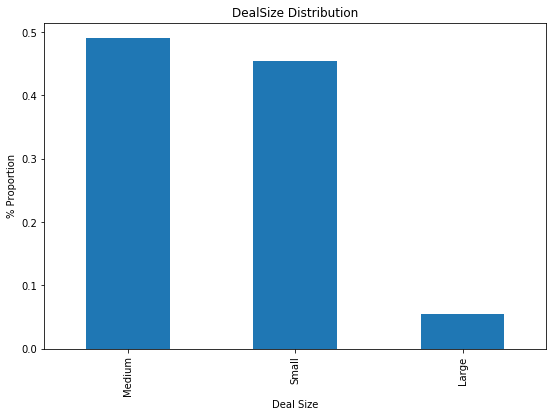

In [18]:
# Bar plot for Categorical variable - Dealsize

plt.figure(figsize=(9,6))
sales['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize Distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

Most of the deals made are Medium followed by Small and very few Large deals are made.

#### Understanding the KPIs

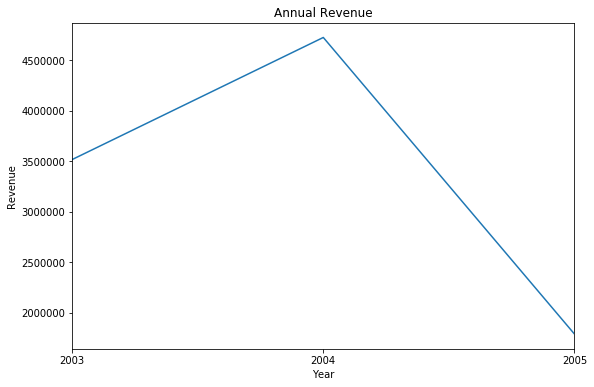

In [20]:
# Yearly Revenue

plt.figure(figsize=(9,6))
sales.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()

As we do not have complete year data for 2005, this graph does not give the right representation.
Hence, considering the Monthly Revenue

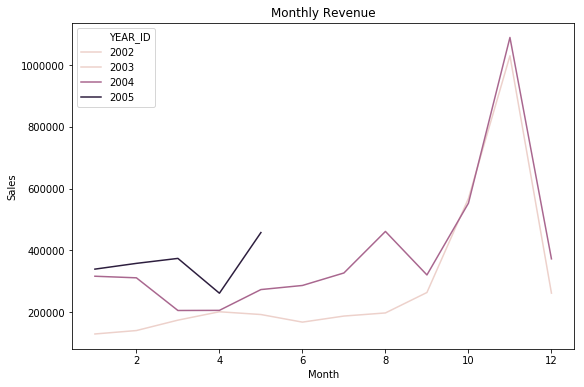

In [21]:
# Monthly Revenue

plt.figure(figsize=(9,6))
monthly_revenue = sales.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()  #list of all months in each year sales data
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

* There is a significant growth of Revenue each year.
* It can also be observed that Months : August- December are generating the most of the revenue each year.

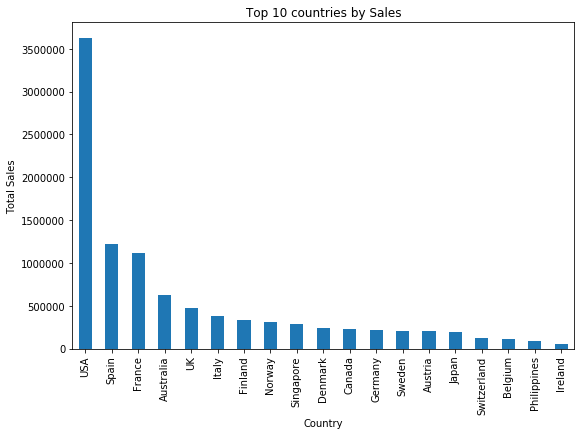

In [22]:
### Country-wise Sales

# Plotting top 10 countries for SALES
plt.figure(figsize=(9,6))
top_cities = sales.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

* USA is leading country , generating most of the revenue with highest Sales.
* Followed by Spain and France with Sales > 1 million

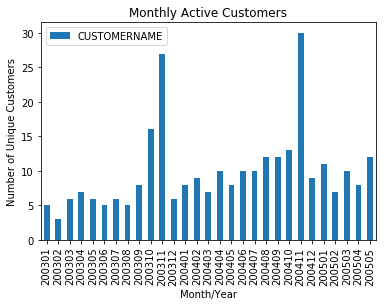

In [23]:
## Customer activity across the Year

#plt.figure(figsize=(10,8))
sales['YEAR_MONTH'] = sales['YEAR_ID'].map(str)+sales['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))  # generating new column with year and month mappin
monthly_active = sales.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()  #Grouping customers according to every month in each year ; Considering only unique customers by their IDs
monthly_active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME')        # Plotting graph for the same
#plt.figure(figsize=(10,8)) 
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
#plt.figure(figsize=(10,8))
plt.show()

* As expected the sales are high during the holiday season, observe 200311 (2003 Nov) and 200411 (2004 Nov) and the months     around these two.
* It also indicates that Company is successful in retaining customers and acquiring new customers.

#### Defining potential customers

A customer can be identified as potential customer by understanding how much revenue is being generated by the customer,
how frequently customer purchases on the website and how recent was the customer's latest purchase.

So defining these three factors as variables as below :
    * Value - Overall revenue being generated by the customer.
    * Frequency - How frequent customer is making the purchases.
    

In [191]:
# Calculating the factors defined above

# creating a new dataframe and storing the dictionary with calculated fields
# frequency by counting the no. of orders
# value is the sum of all purchases made 
# all these fields are grouped by Customer Name


sales_FV = sales.groupby(['CUSTOMERNAME']).agg({'ORDERNUMBER': 'count','SALES':'sum'})

#Renaming the columns
sales_FV.rename(columns={'ORDERNUMBER': 'Frequency','SALES': 'Value'}, inplace=True)

In [192]:
sales_FV.head()

,Frequency,Value
CUSTOMERNAME,,
"AV Stores, Co.",51,157807.81
Alpha Cognac,20,70488.44
Amica Models & Co.,26,94117.26
"Anna's Decorations, Ltd",46,153996.13
Atelier graphique,7,24179.96


### Clustering

#### Agglomerative Clustering

In [41]:
# Importing Libraries
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [100]:
# defining the linkage to be used on the model
Z = linkage(sales_FV_scaled, 'complete')

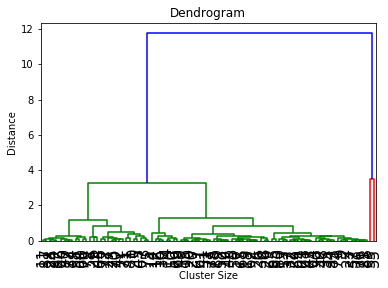

In [101]:
# Plotting a dendrogram to see the levels of  
dendrogram(Z,leaf_rotation=90, leaf_font_size=15.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

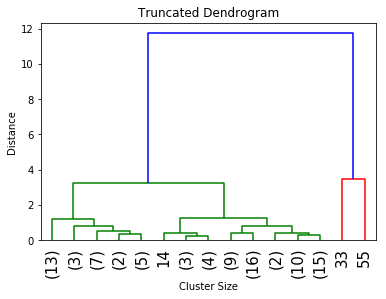

In [193]:
#Plotting a truncated Dendrogram

dendrogram(Z,truncate_mode='lastp',p=15,leaf_rotation=90, leaf_font_size=15.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

In [194]:
#Importing Libraries
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [195]:
# Defining Hierarchial - agglomerative clustering

hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [196]:
# Fitting the model

hclust.fit(sales_FV)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

In [205]:
#sales_FV= sales_FV.drop('Groups', axis = 1)

In [197]:
#Grouping the Data

sales_FV['Groups'] = hclust.labels_

In [198]:
sales_FV.groupby(['Groups']).mean()

,Frequency,Value
Groups,,
0,39.000000,140205.502667
1,21.942308,77418.488846
2,259.000000,912294.110000
3,180.000000,654858.060000
4,9.125000,29193.772500


#### Interpretation

Frequency is number of purchases made by the customer
Value  is the sum of overall revenue generated by customer

We divided the customers into 5 groups using AgglomerativeClustering.
* Cluster 2 and 3 can be assgined as the high value customers - As the value of Frequency and Value are comparitively higher than other groups.
* Cluster 0 and 1 can be assigned as the medium value customers - As the values of Frequency and Value are lying between high and low.
* Cluster 4 can be assigned as the low value customers - As the values of Frequency and value are comparitively low among all groups

### K-means clustering

In [199]:
# Importing Libraries
from sklearn.cluster import KMeans

In [208]:
#sales_FV=sales_FV.drop('Clusters', axis =1)

In [209]:
#Calculating the within group SSE as interia for different cluster solutions

inertias = []
for k in [2,3,4,5,6,7,8,9]:
    km = KMeans(n_clusters=k,n_init=40)
    inertia = km.fit(sales_FV_scaled).inertia_
    inertias.append(inertia)
    
print(inertias)

[177095521011.1087, 81275718631.30609, 48139055589.00479, 25533535364.19399, 13540247462.99012, 8682974637.499615, 5845816174.405325, 4222411322.3848696]


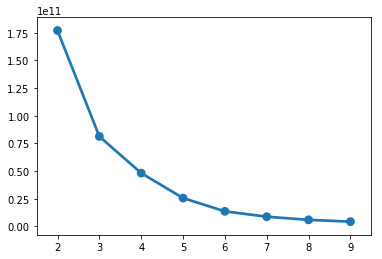

In [210]:
# Plotting screeplot

#plt.plot([2,3,4,5,6,7], inertias)
#plt.show()

k = [2,3,4,5,6,7,8,9]
sns.pointplot(x = list(k), y = list(inertias))
#plt.text()
plt.show()

* Scree plot helps in deciding the number of clusters. The elbow point is defined as the point with highest angle or the point at which the steepness of the curve reduces.
* As per above plot, 5 is identified as an elbow point. Hence, we will be taking no. of clusters as 5 for fitting k-means model.

In [212]:
#Defining k-means with no.o f clusters 

km = KMeans(n_clusters=5,n_init=40)

In [213]:
# Fitting the model

km.fit(sales_FV)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=40, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [214]:
# Defining the clusters

sales_FV['Clusters'] = km1.labels_

In [219]:
# Assigning the values of clusters into a dataframe
clusters = pd.DataFrame()
clusters['index_of_data'] = sales_FV.index.values
clusters['cluster_no'] = km.labels_

In [220]:
# Glimpse of cluster dataframe
clusters.head()

,index_of_data,cluster_no
0,"AV Stores, Co.",2
1,Alpha Cognac,0
2,Amica Models & Co.,4
3,"Anna's Decorations, Ltd",2
4,Atelier graphique,0


In [221]:
# Displaying head values of cluster 1 values

cluster1 = sales_FV.loc[clusters[clusters['cluster_no'] == 0]['index_of_data'].values,:]
cluster1.head()

,Frequency,Value,Clusters
CUSTOMERNAME,,,
Alpha Cognac,20,70488.44,0
Atelier graphique,7,24179.96,0
"Australian Collectables, Ltd",23,64591.46,0
"Australian Gift Network, Co",15,59469.12,0
Auto Assoc. & Cie.,18,64834.32,0


In [222]:
# Displaying head values of cluster 2 values

cluster2 = sales_FV.loc[clusters[clusters['cluster_no'] == 1]['index_of_data'].values,:]
cluster2.head()

,Frequency,Value,Clusters
CUSTOMERNAME,,,
Euro Shopping Channel,259,912294.11,1


In [223]:
# Displaying head values of cluster 3 values

cluster3 = sales_FV.loc[clusters[clusters['cluster_no'] == 2]['index_of_data'].values,:]
cluster3.head()

,Frequency,Value,Clusters
CUSTOMERNAME,,,
"AV Stores, Co.",51,157807.81,2
"Anna's Decorations, Ltd",46,153996.13,2
"Australian Collectors, Co.",55,200995.41,2
Corporate Gift Ideas Co.,41,149882.50,2
Danish Wholesale Imports,36,145041.60,2


In [224]:
# Displaying head values of cluster 4 values

cluster4 = sales_FV.loc[clusters[clusters['cluster_no'] == 3]['index_of_data'].values,:]
cluster4.head()

,Frequency,Value,Clusters
CUSTOMERNAME,,,
Mini Gifts Distributors Ltd.,180,654858.06,3


In [225]:
# Displaying head values of cluster 5 values

cluster5 = sales_FV.loc[clusters[clusters['cluster_no'] == 4]['index_of_data'].values,:]
cluster5.head()

,Frequency,Value,Clusters
CUSTOMERNAME,,,
Amica Models & Co.,26,94117.26,4
Auto Canal Petit,27,93170.66,4
Baane Mini Imports,32,116599.19,4
"Blauer See Auto, Co.",22,85171.59,4
Canadian Gift Exchange Network,22,75238.92,4


As per above dataframe, we ae doing analysis for Cluster 4 customers:
* Amica Models & Co. are purchasing goods of worth 94117$ and are frequent buyers with having a frequency of 26.

Similarly we can interpret the other customers in each cluster

In [227]:
# Finding out the number of unique customers in each cluster

grouped = sales_FV.groupby(['Clusters'])

grouped.agg({'Frequency':['mean','count'],'Value':['mean','count']})

Frequency                Value      
                mean count           mean count
Clusters                                       
0          14.520000    25   49647.509600    25
1         259.000000     1  912294.110000     1
2          43.833333    18  156024.620000    18
3         180.000000     1  654858.060000     1
4          26.212766    47   93954.165532    47

 We can see from above dataframe:
 * 1.Customers in Cluster 1 and 3 are high yielding customers
 * 2.Customers in Cluster 2 and 4 are medium yielding customers
 * 3.Customers in Cluster 0 is low yeilding cluster

In [238]:
# Mapping the clusters to High-Medium-Low yielding customers

def customer_level(df):
    if np.bool(df['Clusters'] == 0):
        return 'Low yielding Customer'
    elif np.bool(df['Clusters'] == 2 or df['Clusters'] == 4):
        return 'Medium yielding Customer'
    else:
        return 'High yielding Customer'

In [243]:
sales_FV['Customer_Level'] = sales_FV.apply(customer_level, axis=1)

sales_FV.sample(5)

,Frequency,Value,Clusters,Customer_Level
CUSTOMERNAME,,,,
"UK Collectables, Ltd.",29,118008.27,4,Medium yielding Customer
Mini Auto Werke,15,52263.90,0,Low yielding Customer
Quebec Home Shopping Network,22,74204.79,4,Medium yielding Customer
Euro Shopping Channel,259,912294.11,1,High yielding Customer
Souveniers And Things Co.,46,151570.98,2,Medium yielding Customer


 Created new variable named Customer_Level. This variable is created using Clusters. 
* For Customers in Cluster 1 and 3, Customer_level will define the Customers as a High yielding customer
* For Customers in Cluster 2 and 4, Customer_level will define the Customers as a Medium yielding customer
* For Customers in Cluster 0 Customer_level will define the Customers as a Low yielding customer

Hence, the objective of identifying customers into three groups is achieved. This will help the business to design their sales and offers in a better way.